In [27]:
#Code proposé par M.Nataf:Séance 1
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

In [28]:
mat=spi.loadmat("mnist-original.mat")
data=np.transpose(mat['data'])
label=np.array(mat['label']) #label: chiffre numérisé
label=label.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

Découpe aléatoire de la base de données en base d'apprentissage et base de test

In [29]:
Y,y=data,label[0]
#On change l'ordre des données et des labels avec la même permutation pour que data_test et data_app soient hétérogènes...
def decoupe_aleatoire_base(Y,y):
    m=np.random.permutation((len(y))) #permutation arbitraire
    Y_m=Y[m] #data après permutation
    y_m=y[m] #labels après permutation
    n=len(Y) #nombre d'images dans la base donnée
    n_80=80*n/100 #nombre d'images dans la base d'apprentissage
    n_80=int(n_80)
    data_app=Y_m[:n_80] #base d'apprentissage
    label_app=y_m[:n_80]
    data_test=Y_m[n_80:] #base de tests
    label_test=y_m[n_80:]
    return data_app,label_app,data_test,label_test

Dans la base d'apprentissage, calcul des centoides des chiffres

In [30]:
def calcul_centroides(data_app,label_app):
    X,x=data_app,label_app 
    moy_chiff=[]
    for i in range(10):
        moy=np.mean(X[x==i],axis=0)
        moy_chiff+=[moy]
    return moy_chiff

Méthode d'estimation par rapport à la distance euclidienne

In [31]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

Méthode d'estimation par rapport à la "distance" cosine

In [32]:
#On définit la fonction cosine:
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [33]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la "distance" cosine:
def estim_chiffre_2(v,moy_chiff):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

Méthode d'estimation par rapport à la norme p

In [34]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la norme p:
def estim_chiffre_p(p,v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens" en norme p
    return np.argmin(distances)

Calcul du pourcentage de prédictions correctes sur la base de tests

In [35]:
#Labels estimés pour les vecteurs de la base de tests et pour une certaine distance:
def precision_estimation_label(data_test,label_test,methode,p,moy_chiff): # renseigner un p quelconque si on n'utilise pas la norme p (par ex p=0)
    k=len(data_test)
    label_estim=np.zeros(k)
        
    if (methode != estim_chiffre_p):      
        for i in range(k):
            label_estim[i]=methode(data_test[i],moy_chiff)
            #print("la précision obtenue est de", np.mean(label_estim==label_test))
            
    else:
        for i in range(k):
            label_estim[i]=methode(p, data_test[i],moy_chiff)
            #print("la précision obtenue pour p={} est de".format(p), np.mean(label_estim==label_test))
        
    return np.mean(label_estim==label_test) #  pourcentage de prédictions correctes sur la base de tests.

Fonction permettant de calculer la précision d une méthode (pour une seule découpe initiale)

In [36]:
def Precision_methode(methode,p,Y,y):    
    data_app,label_app,data_test,label_test=decoupe_aleatoire_base(Y,y)
    moy_chiff=calcul_centroides(data_app,label_app)
    precision=precision_estimation_label(data_test,label_test,methode,p,moy_chiff)
    return precision

### Calcul de la moyenne et de la variance de nos méthodes de prédiction pour plusieurs découpes aléatoires de la bdd

In [38]:
def Moyenne_variance(iterations,methode,p,Y,y):
    Predictions=[]
    
    for i in range(iterations):
        precision=Precision_methode(methode,p,Y,y)
        Predictions.append(precision)
    
    Predictions=np.array(Predictions)
    Moyenne=np.mean(Predictions)
    Variance=np.var(Predictions)
    print("Moyenne:",Moyenne)
    print("Variance:", Variance)
    return Moyenne, Variance

Moyenne et variance de la méthode de la norme euclidienne pour 100 découpes aléatoires de la BDD

In [ ]:
Moyenne_variance(100,estim_chiffre_1,0,Y,y)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 80,6%).

Moyenne et variance de la méthode cosine pour 100 découpes aléatoires de la BDD

In [162]:
Moyenne_variance(100,estim_chiffre_2,0,Y,y)

Moyenne: 0.8146835714285714
Variance: 6.854413775510206e-06


(0.8146835714285714, 6.854413775510206e-06)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 81,4%).

In [24]:
def estim_chiffre_inf(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,np.inf) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

In [25]:
Moyenne_variance(100,estim_chiffre_inf,0,Y,y)

Moyenne: 0.6699535714285716
Variance: 1.3572793367346892e-05


(0.6699535714285716, 1.3572793367346892e-05)

Moyenne et variance de la méthode de la norme p pour 100 découpes aléatoires de la BDD

Avec p=3

In [163]:
Moyenne_variance(100,estim_chiffre_p,3,Y,y)

Moyenne: 0.820355
Variance: 8.882903571428592e-06


(0.820355, 8.882903571428592e-06)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 82,05%).

Avec p=4

In [164]:
Moyenne_variance(100,estim_chiffre_p,4,Y,y)

Moyenne: 0.8115399999999999
Variance: 9.961461224489778e-06


(0.8115399999999999, 9.961461224489778e-06)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 81,5%).

Avec p=5

In [165]:
Moyenne_variance(100,estim_chiffre_p,5,Y,y)

Moyenne: 0.8000042857142857
Variance: 6.213655102040815e-06


(0.8000042857142857, 6.213655102040815e-06)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 80,5%).

Avec p=6

In [167]:
Moyenne_variance(100,estim_chiffre_p,6,Y,y)

Moyenne: 0.7898971428571427
Variance: 1.1379216326530578e-05


(0.7898971428571427, 1.1379216326530578e-05)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 79,5%).

Avec p=7

In [173]:
Moyenne_variance(100,estim_chiffre_p,7,Y,y)

Moyenne: 0.7809178571428572
Variance: 1.0354221938775518e-05


(0.7809178571428572, 1.0354221938775518e-05)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 78,6%).

Avec p=8

In [174]:
Moyenne_variance(100,estim_chiffre_p,8,Y,y)

Moyenne: 0.7728050000000001
Variance: 1.1948454591836782e-05


(0.7728050000000001, 1.1948454591836782e-05)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 77,9%).

Avec p=9

In [175]:
Moyenne_variance(100,estim_chiffre_p,9,Y,y)

Moyenne: 0.7673378571428571
Variance: 1.208763826530608e-05


(0.7673378571428571, 1.208763826530608e-05)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 77,2%).

Avec p=10

In [176]:
Moyenne_variance(100,estim_chiffre_p,10,Y,y)

Moyenne: 0.7607971428571428
Variance: 8.618848979591805e-06


(0.7607971428571428, 8.618848979591805e-06)

(Pour rappel, notre estimation de précision pour une seule découpe aléatoire initiale était de 76,5%).

### Graphique

In [2]:
Moyenne_100_iterations=[0.8094549999999999,0.8146835714285714, 0.820355, 0.8115399999999999,0.8000042857142857,0.7898971428571427
, 0.7809178571428572, 0.7728050000000001, 0.7673378571428571,0.7607971428571428,0.6699535714285716]

Une_seule_decoupe=[0.8159285714285714,0.8216428571428571,0.8250714285714286, 0.8174285714285714, 0.8033571428571429, 0.7943571428571429, 0.7848571428571428, 0.7779285714285714, 0.7712142857142857, 0.7649285714285714, 0.6752857142857143]
Legende=['norme2', 'cosine', 'norme3', 'norme4', 'norme5', 'norme6', 'norme7', 'norme8', 'norme9', 'norme10','norme \u221e']

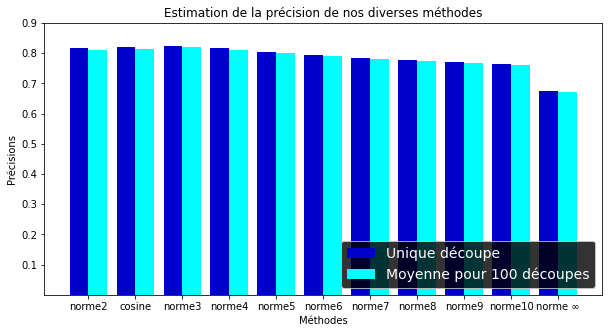

In [24]:
plt.figure(figsize=(10,5))
plt.title('Estimation de la précision de nos diverses méthodes')
plt.bar(Legende,Une_seule_decoupe, width=-0.4, align='edge',label='Unique découpe',color='mediumblue')
plt.bar(Legende,Moyenne_100_iterations, width=0.4, align='edge',label='Moyenne pour 100 découpes',color='cyan')
plt.xticks(Legende)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.xlabel(r'Méthodes')
plt.ylabel(r'Précisions')
plt.legend(loc='lower right',prop={'size': 14},facecolor='k', labelcolor='w')
plt.show()

### Ecart maximum entre résultats

Calcul de l'écart maximum en termes de résultat entre la méthode 1 (une seule découpe initiale) et la méthode 2 (prendre la moyenne de 100 découpes initiales aléatoires)

In [28]:
Ecart_max=np.max(np.abs(np.array(Une_seule_decoupe)-np.array(Moyenne_100_iterations)))
print(Ecart_max)

0.006959285714285723
